# English Layouts Evaluation

I decided to test English layouts with the evaluation method used with Russian ones.

In [1]:
from lib import Corpus, Keyboard, Layout, Result, STANDARD_KBD, std_key_shape, STD_EXTRA_KEYS, ERGODOX, compare
import pandas as pd

I took some New Yorker articles from archive.org. They're quite long. I replaced the pretty double/single quotes to standard, and long dash with standard hyphen, otherwise they're not counted at all.

## Position Penalties

/home/culebron/Documents/2024/keyboard/kbdopt-ru/lib.py:194: RuntimeWarning: invalid value encountered in scalar divide
  return lighten_color(scale((val - min_val) / (max_val - min_val)), lighten)


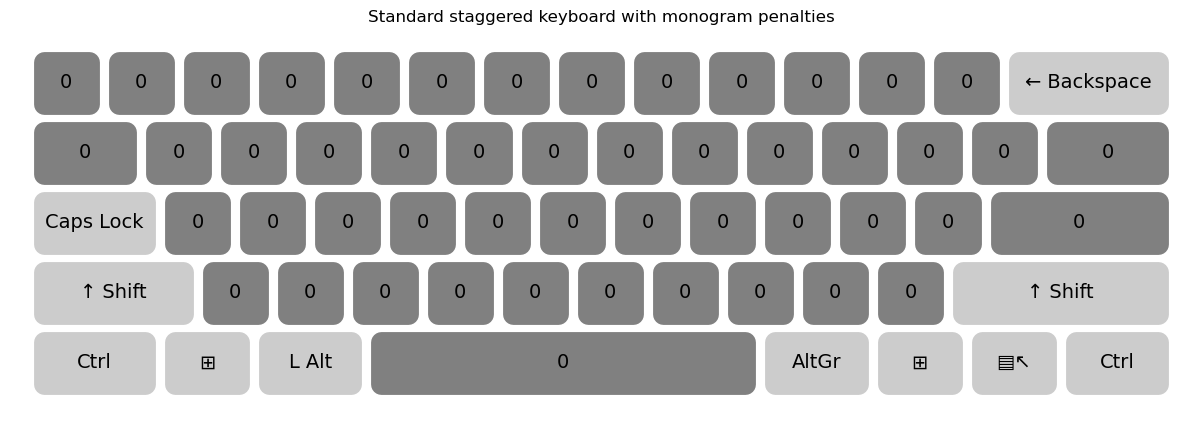

In [2]:
_ = STANDARD_KBD.display()

In [3]:
ENG = Corpus.from_path('english.txt', types={'v': 'aoeuiy', 'c': 'bcdfghjklmnpqrstvwxz'})

In [4]:
# Analyzing Where Keys Gravitate to

## Inner (index finger) or outer (pinky)


In [5]:
ENG.bigrams

,bigram,num,l1,l2,t1,t2,freq
0,by,231,b,y,c,v,0.000939
1,y⌴,1817,y,⌴,v,-,0.007386
2,⌴p,1572,⌴,p,-,c,0.006390
3,pa,676,p,a,c,v,0.002748
4,au,212,a,u,v,v,0.000862
...,...,...,...,...,...,...,...
1129,9/,1,9,/,-,-,0.000004
1130,/1,1,/,1,-,-,0.000004
1131,h?,1,h,?,c,-,0.000004
1132,bd,1,b,d,c,c,0.000004


,freq_out,freq_in,outer,frequency,outerness
l1,,,,,
e,107.112515,72.885290,-34.227225,179.997805,-1901.535682
i,68.657699,47.641695,-21.016004,116.299395,-1807.060468
o,97.397186,71.543843,-25.853343,168.941029,-1530.317613
y,24.999695,30.162234,5.162539,55.161929,935.887988
a,48.901843,70.446295,21.544453,119.348138,1805.177112
u,21.463153,75.852734,54.389581,97.315886,5588.972431


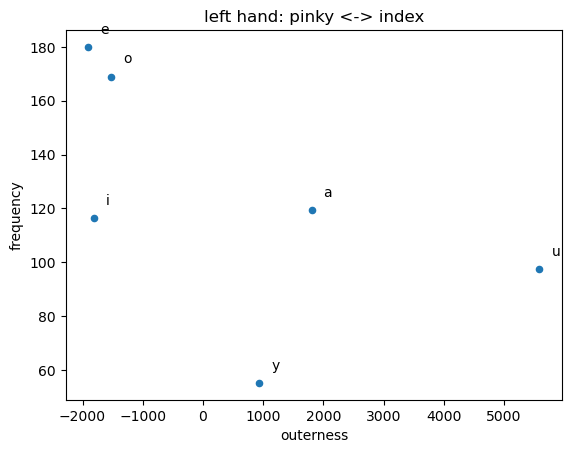

In [6]:
ENG.display_outerness("(t1 == 'v') & (t2 == 'v')", True)

,freq_out,freq_in,outer,frequency,outerness
q,0.000000,1.788596,-1.788596,1.788596,-10000.000000
v,0.121950,9.918578,-9.796628,10.040528,-9757.085020
h,20.324955,318.532701,-298.207745,338.857656,-8800.383877
j,0.121950,1.178847,-1.056898,1.300797,-8125.000000
d,29.552485,120.974134,-91.421649,150.526620,-6073.453956
k,18.861559,35.406072,-16.544514,54.267631,-3048.689139
g,41.950708,77.397430,-35.446722,119.348138,-2970.027248
l,98.332134,113.616501,-15.284366,211.948635,-721.135405
m,24.877745,27.357390,-2.479645,52.235135,-474.708171
r,123.006630,119.144888,3.861742,242.151518,159.476246


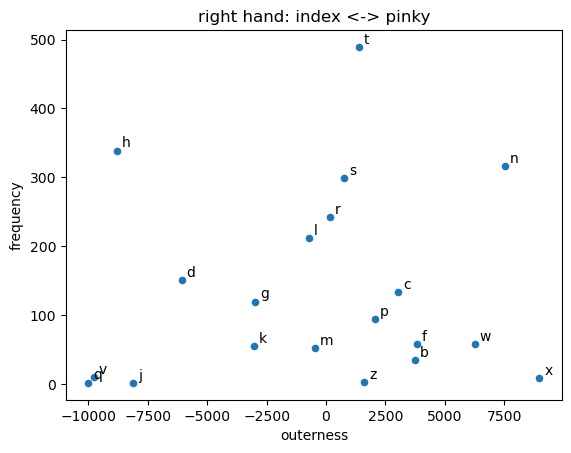

In [7]:
ENG.display_outerness("(t1 == 'c') & (t2 == 'c')")

In [8]:
eng_layouts = {
    'sholes1': r'''
    
`12345 67890-=
→qwert yuiop[]\
 asdfg hjkl;'¶
 zxcvb nm,./
⌴

~!"#$% ^&*()_+
 ∅∅∅∅∅ ∅∅∅∅∅{}|
 ∅∅∅∅∅ ∅∅∅∅:"∅
 ∅∅∅∅∅ ∅∅<>?
∅
''',

    'dvorak': r'''
`75319 02468[]
→:,.py fgcrl/=\
 aoeui dhtns-¶
 ;qjkx bmwvz
⌴

~#()"% -∅$@*{}
 ?'∅∅∅ ∅∅∅∅∅?+|
 ∅∅∅∅∅ ∅∅∅∅∅_
 !∅∅∅∅ ∅∅∅∅∅
∅
''',
    'colemak': r'''
`12345 67890-=
→qwfpg jluy;[]\
 arstd hneio'¶
 zxcvb km,./
⌴

~!"#$% ^&*()_+
 ∅∅∅∅∅ ∅∅∅∅:{}|
 ∅∅∅∅∅ ∅∅∅∅∅"∅
 ∅∅∅∅∅ ∅∅<>?
∅
''',
  
    # note: 0 & 1 weren't there in the real layout.
    'sholes2': r'''
012345 6789$&z
→xpmch rtnsdgk`
 jbwfl aeiouy¶
 qv:;. ,!?-"_
⌴

~@#∅% ^∅*()_+
 ∅∅∅∅∅ ∅∅∅∅:{}|
 ∅∅∅∅∅ ∅∅∅∅∅∅
 ∅∅[]< >∅∅∅∅∅
∅
''',

    'blick': r'''
∅∅∅∅∅∅ ∅∅∅∅∅∅∅
→∅zxkg bvqj∅∅∅∅
 .pwfu lcmy,¶
 dhiat ensor
⌴

∅∅∅∅∅∅ ∅∅∅∅∅∅
 &∅∅∅( )@#*∅∅∅∅
 -/'"! ;?%:`
 12345 67890
∅
''',
}


In [9]:
# these keys MUST be in any layout, otherwise the code throws an exception and halts
ENG_BASE = set('`-!?%*():;.,⌴¶abcdefghijklmnopqrstuvwxyz')

res = {}
for k, l in eng_layouts.items():
    print(k, end=': ')
    res[k] = r = Result(ENG, Layout(k, l, base_keys=ENG_BASE))
    print(r.score)

sholes1: key """ repeated: 2
6.851282541254312
dvorak: key "?" repeated: 2
key "-" repeated: 2
4.442775387594537
colemak: key """ repeated: 2
4.595134061096828
sholes2: key "_" repeated: 2
key ":" repeated: 2
9.778777910177894
blick: 8.439360270270834


# Standings

In [10]:
comments = {'sholes1': 'QWERTY, 1879', 'sholes2': 'Sholes\' last layout, 1889', 'dvorak': '1936', 'colemak': '2006', 'blick': 'Blickensderfer №4, 1895'}
print(pd.DataFrame([(k, v.score.round(3), comments[k]) for k, v in res.items()],
        columns=['layout', 'score', 'comment']).sort_values('score', ascending=True)
    .to_markdown(index=False))

| layout   |   score | comment                   |
|:---------|--------:|:--------------------------|
| dvorak   |   4.443 | 1936                      |
| colemak  |   4.595 | 2006                      |
| sholes1  |   6.851 | QWERTY, 1879              |
| blick    |   8.439 | Blickensderfer №4, 1895   |
| sholes2  |   9.779 | Sholes' last layout, 1889 |


Dvorak layout is still the best, if we weigh bigrams seriously. Colemak was a mix of both, and scores slightly worse, but not as badly as I expected.

## Arrow Maps

The less arrows, the better.

Look at the arrow maps: almost all arrows are thin, and there are few of them. QWERTY has lots of thick arrows. Colemak has noteably more than Dvorak, but the score is quite ok.

I expected Colemak to have a lot of costs on the left hand, but it has more on the right.

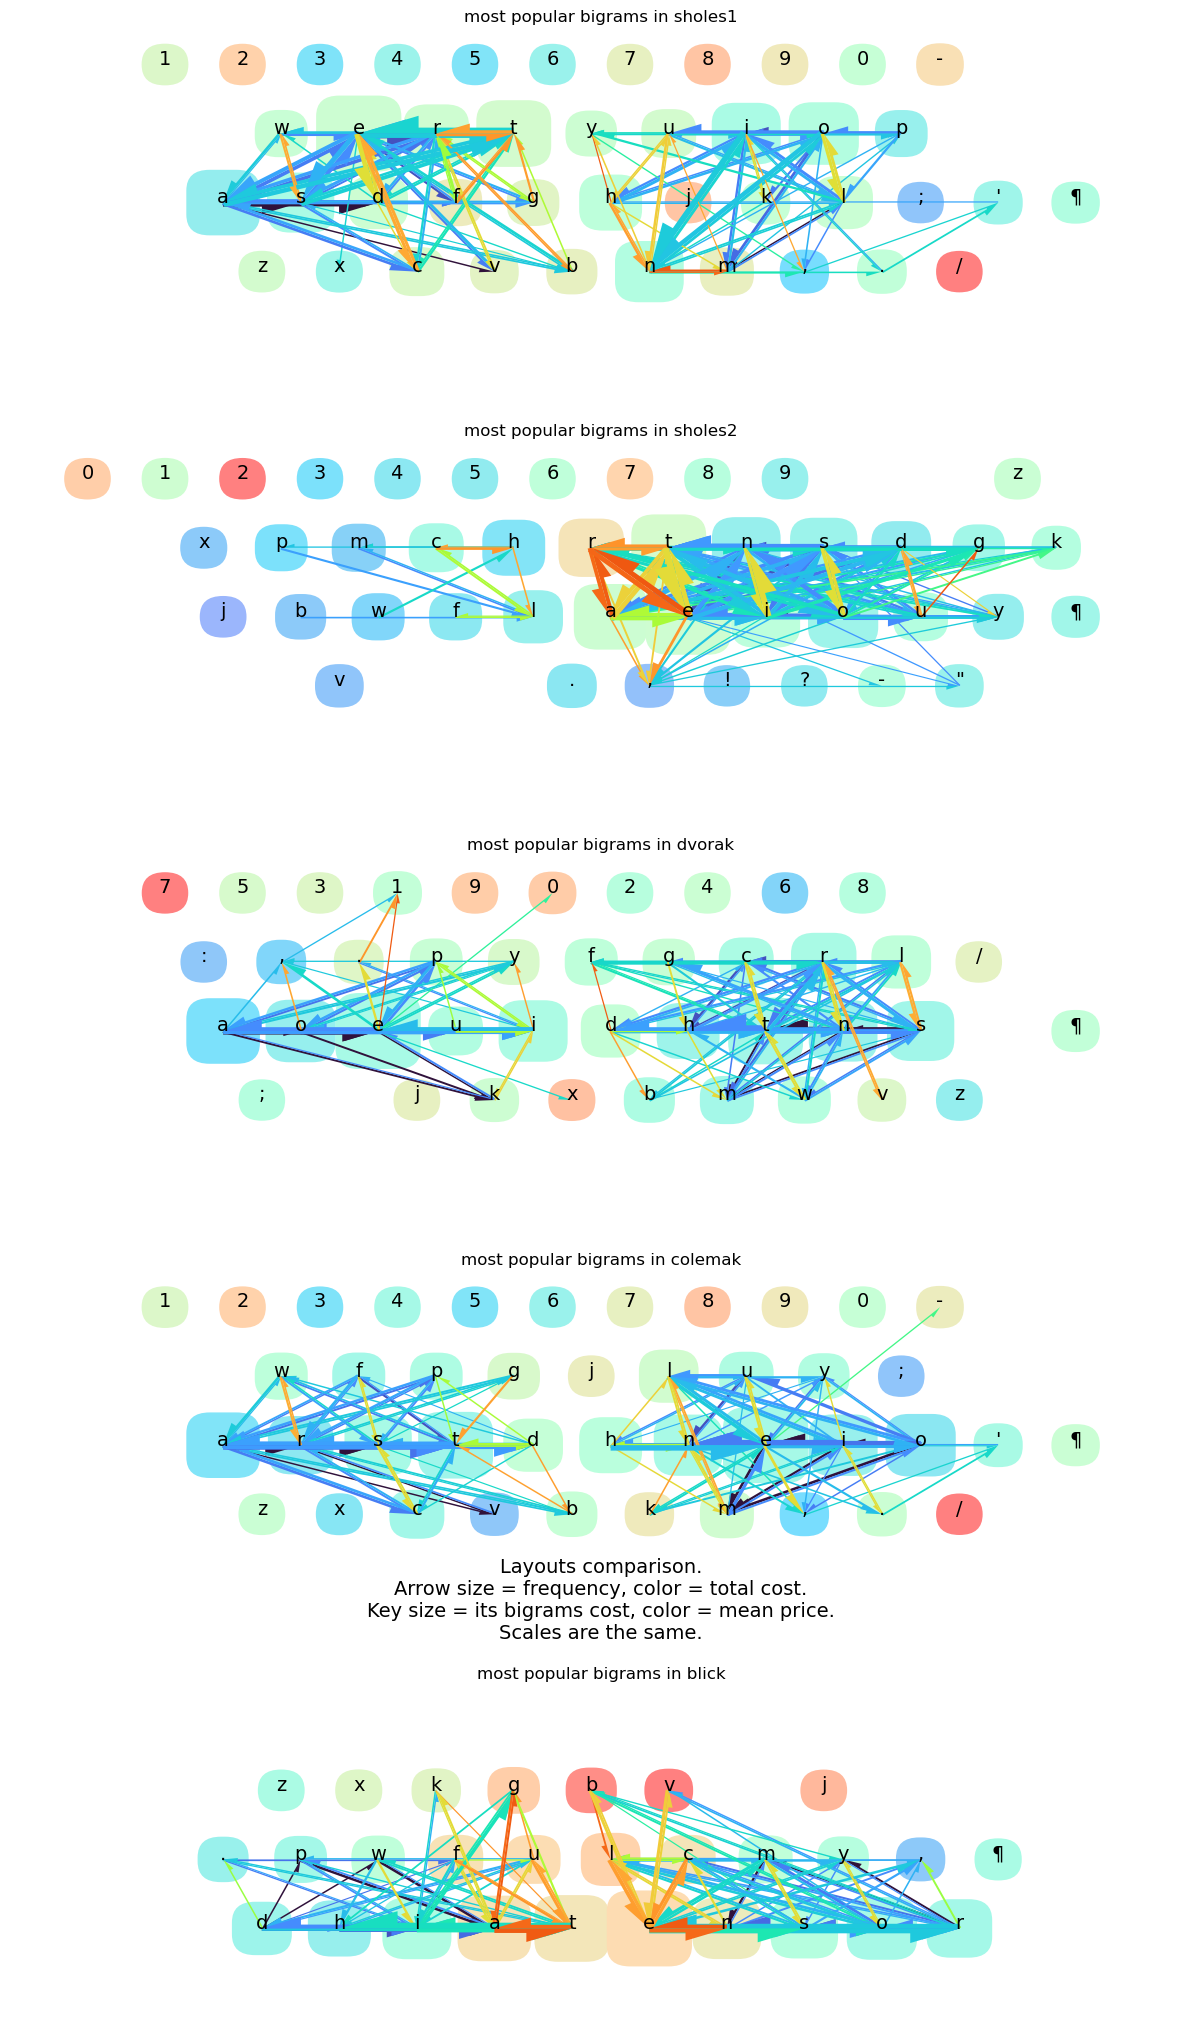

In [11]:
res['sholes1'].combomap(res['sholes2'], res['dvorak'], res['colemak'], res['blick'])

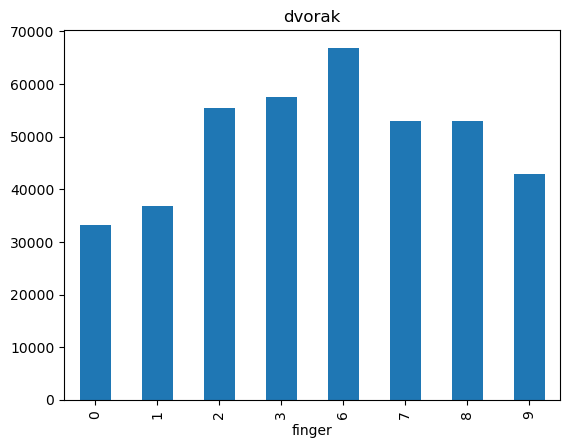

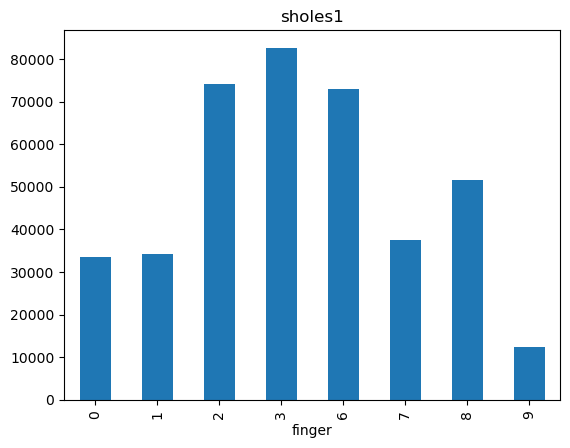

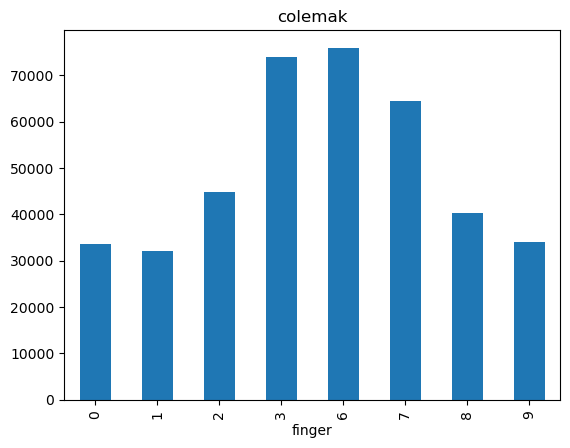

In [12]:
res['dvorak'].load_bars()
res['sholes1'].load_bars()
res['colemak'].load_bars()

# Gravitation to Rows

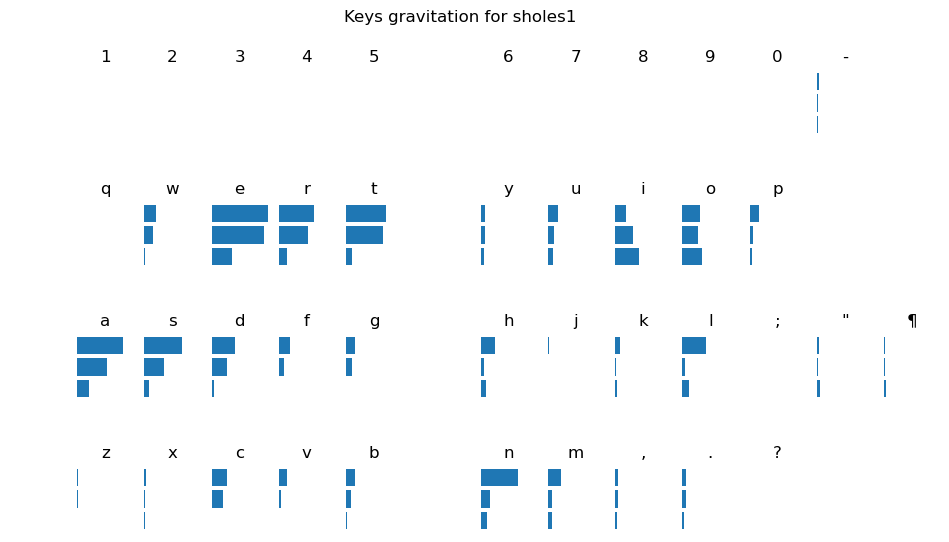

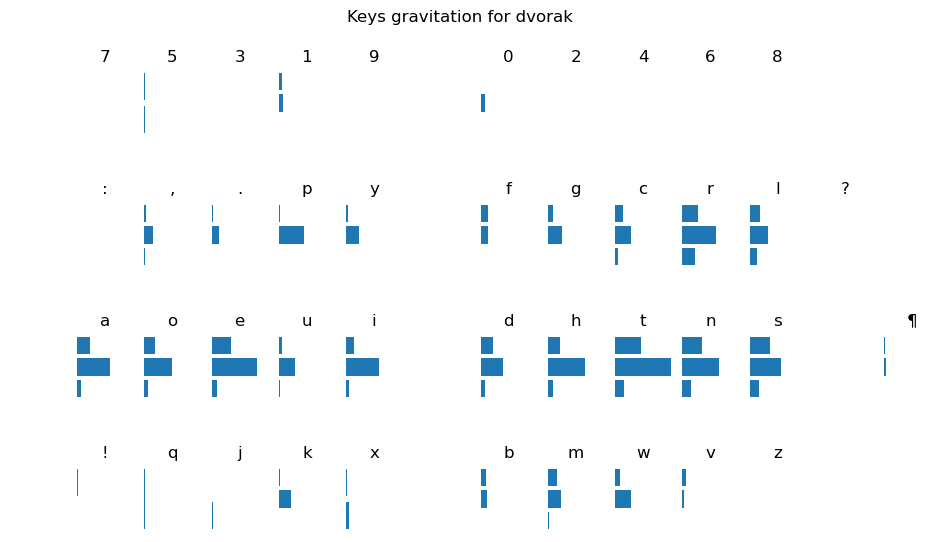

In [13]:
res['sholes1'].display('rows')
res['dvorak'].display('rows')